In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: Predicting College Admissions

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [3]:
# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data exploration using train and basic models [16 pts]**](#part1)

- [**Question 2: Interpretable modeling [18 pts]**](#part2)

- [**Question 3: Harvard and Yale? [30 pts]**](#part3)

- [**Question 4: Building predictive models for admitted [24 pts]**](#part4)

- [**Question 5: Evaluating results [12 pts]**](#part5)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `"admitted"` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test_score**: a standardized measurement of the applicant's highest ACT or SAT combined score (2400 is the maximum)
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of the applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = United States
- **sports**: a binary indicator for High School All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

**The main set of 12 predictors is:**

```python
[
    "test_score", "ap", "avg_ap", "sat_subjects", 
    "gpa", "female", "minority", "international",
    "sports", "school", "early_app", "alumni",
]
```

Please note, you may need to modify this list when fitting different models, and you will be replacing the `"school"` variable with a binary `"harvard"` variable early in the questions below.


**IMPORTANT NOTES:**

- Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).


- When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).


- Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.

---

<a id="part1"></a>

## <div class='exercise'>Question 1: Data exploration using train and basic models [16 pts]</div>

[Return to contents](#contents)

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While an argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **[Question 4.1](#part4)**.


In [4]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv("data/college_admissions.csv")
np.random.seed(121)

college_train, college_test = train_test_split(
    college,
    test_size=0.2,
    random_state=121,
    shuffle=True,
    stratify=college["school"],
)

print(college.shape)
print(college_train.shape, college_test.shape)
display(college_train.head())
college_train.info()

(1871, 16)
(1496, 16) (375, 16)


,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info
584,JTEQOV7ZCB,0,2080,5,4.400,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...
1817,I03PV24OHY,1,2190,6,3.667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marching concert jazz and orchestral ensembles 30 hrs wee...
1308,K42SAOUYJJ,0,2140,2,4.500,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch Summer Film WorkshopNational Honors Society World ...
1336,LODYYSRTYZ,0,2120,6,3.333,3,4.00,1,0,0,0,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Violin Player Girl Scouts 10 year Member sold over 65...
3,OC717EAKXN,1,2400,5,5.000,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 584 to 1537
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1496 non-null   object 
 1   admitted       1496 non-null   int64  
 2   test_score     1496 non-null   int64  
 3   ap             1496 non-null   int64  
 4   avg_ap         1496 non-null   float64
 5   sat_subjects   1496 non-null   int64  
 6   gpa            1496 non-null   float64
 7   female         1496 non-null   int64  
 8   minority       1496 non-null   int64  
 9   international  1496 non-null   int64  
 10  sports         1496 non-null   int64  
 11  school         1496 non-null   object 
 12  early_app      1496 non-null   int64  
 13  alumni         1496 non-null   int64  
 14  program        1294 non-null   object 
 15  add_info       933 non-null    object 
dtypes: float64(2), int64(10), object(4)
memory usage: 198.7+ KB


<div class='exercise-r'>

**Q1.1** Calculate the proportion of observations in the train data that were admitted and store this value in `prop_admitted_train`.  What would be the train and test classification accuracies for a baseline "naive" model where we classified *ALL* applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)? Store these classification accuracies in `naive_train_acc` and `naive_test_acc`.
    
**NOTE:** For this assignment, use the convention that accuracies range from 0 to 1 (to be consistant with sklearn).
    
</div>

_Points:_ 2.5

In [5]:
# your code here
n_admitted_train = len(college_train.loc[college_train['admitted'] == 1])
n_admitted_overall = len(college.loc[college['admitted'] == 1])
n_admitted_test = len(college_test.loc[college_test['admitted'] == 1])

prop_admitted_train = n_admitted_train/len(college_train) 
prop_admitted_overall = n_admitted_overall/len(college) 
prop_admitted_test = n_admitted_test/len(college_test) 


naive_train_acc = 1 - prop_admitted_train
naive_test_acc = 1 - prop_admitted_test

In [6]:
print('Proportion admitted overall:', prop_admitted_overall)
print('Proportion admitted training data:', prop_admitted_train)
print('Proportion admitted testing data:', prop_admitted_test)

Proportion admitted overall: 0.2699091394975949
Proportion admitted training data: 0.2627005347593583
Proportion admitted testing data: 0.2986666666666667


Note that all admission proportions here are less than 0.5 (i.e., 50%). Hence, the naive model would just predict rejection across all applicants. This is why in order to calculate `naive_train_acc` and `naive_test_acc` we just subtract our admission proportions from 1 (i.e., 100% of applicants). This would then give us the proportion of rejected students.

In [7]:
print(f"Proportion Admitted in training Data: {prop_admitted_train:.2f}")
print("Naive Classification Model Based on Training Proportions")
print(f"\tTrain Accuracy: {naive_train_acc:.2f}")
print(f"\tTest Accuracy: {naive_test_acc:.2f}")

Proportion Admitted in training Data: 0.26
Naive Classification Model Based on Training Proportions
	Train Accuracy: 0.74
	Test Accuracy: 0.70


In [8]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.2** Create a binary ("dummy") variable named `"harvard"` in both the train and test DataFrames that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore how each of our 12 predictors is associated with whether or not an applicant is admitted into the college to which they applied (`admitted`). Create a separate **visual** for each of our predictors to investigate their relationship with college admissions. **Suggestion:** Place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**NOTE:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
    
</div>

_Points:_ 0

In [9]:
# Create dummy variable
# your code here

harvard = lambda x: 1 if x == 'Harvard' else 0


college_train['harvard'] = college_train['school'].map(harvard)
college_test['harvard'] = college_test['school'].map(harvard)
college['harvard'] = college['school'].map(harvard)

# Adding this to be able to pass the test below...
X_train = college_train
X_test = college_test

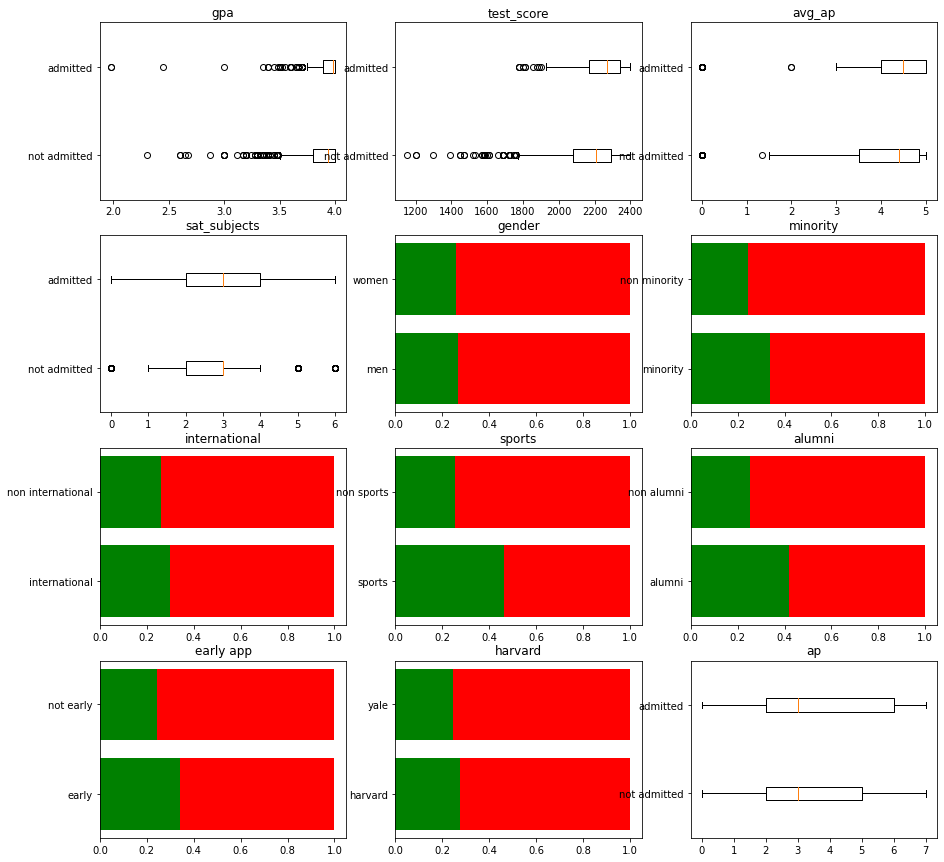

In [10]:
# Plotting
# your code here

# your code here
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15))


#GPA
GPAS_not_admitted = college_train.query("admitted == 0")["gpa"]
GPAS_admitted = college_train.query("admitted == 1")["gpa"]
ax[0,0].boxplot([GPAS_not_admitted,GPAS_admitted], vert=0);
ax[0,0].set_yticklabels(["not admitted", "admitted"]);
ax[0,0].set_title("gpa")

# Test Score
test_score_not_admitted = college_train.query("admitted == 0")["test_score"]
test_score_admitted = college_train.query("admitted == 1")["test_score"]
ax[0,1].boxplot([test_score_not_admitted, test_score_admitted], vert=0);
ax[0,1].set_yticklabels(["not admitted", "admitted"]);
ax[0,1].set_title("test_score")

# Average AP
avg_ap_not_admitted = college_train.query("admitted == 0")["avg_ap"]
avg_ap_admitted = college_train.query("admitted == 1")["avg_ap"]
ax[0,2].boxplot([avg_ap_not_admitted, avg_ap_admitted], vert=0);
ax[0,2].set_yticklabels(["not admitted", "admitted"]);
ax[0,2].set_title("avg_ap")

# Sat Subjects
sat_subjects_not_admitted = college_train.query("admitted == 0")["sat_subjects"]
sat_subjects_admitted = college_train.query("admitted == 1")["sat_subjects"]
ax[1,0].boxplot([sat_subjects_not_admitted, sat_subjects_admitted], vert=0);
ax[1,0].set_yticklabels(["not admitted", "admitted"]);
ax[1,0].set_title("sat_subjects")

# Female
men_not_admitted = len(college_train.query("admitted == 0 and female ==0"))
men_admitted = len(college_train.query("admitted == 1 and female ==0"))
pc_men_admitted = men_admitted/(men_admitted+men_not_admitted)

women_not_admitted = len(college_train.query("admitted == 0 and female ==1"))
women_admitted = len(college_train.query("admitted == 1 and female ==1"))
pc_women_admitted = women_admitted/(women_not_admitted+women_admitted)

ax[1,1].barh(["men","men", "women", "women"], [1, pc_men_admitted, 1, pc_women_admitted], color=["red","green","red","green"]);
ax[1,1].set_title("gender")

# Minority
non_minority_admitted = len(college_train.query("admitted == 1 and minority == 0"))
non_minority_not_admitted = len(college_train.query("admitted == 0 and minority ==0"))
total_non_minority = non_minority_not_admitted + non_minority_admitted
pct_non_minority_admitted = non_minority_admitted/total_non_minority

minority_admitted = len(college_train.query("admitted == 1 and minority==1"))
minority_not_admitted = len(college_train.query("admitted == 0 and minority ==1"))
total_minority = minority_not_admitted + minority_admitted
pct_minority_admitted = minority_admitted / total_minority
ax[1,2].barh(["minority","minority", "non minority", "non minority"], [1, pct_minority_admitted, 1, pct_non_minority_admitted], color=["red","green","red","green"]);
ax[1,2].set_title("minority")


# International
non_international_admitted = len(college_train.query("admitted == 1 and international == 0"))
non_international_not_admitted = len(college_train.query("admitted == 0 and international ==0"))
total_non_international = non_international_admitted + non_international_not_admitted
pct_non_international_admitted = non_international_admitted/total_non_international

international_admitted = len(college_train.query("admitted == 1 and international==1"))
international_not_admitted = len(college_train.query("admitted == 0 and international ==1"))
total_international = international_admitted + international_not_admitted
pct_international_admitted = international_admitted / total_international
ax[2,0].barh(["international","international", "non international", "non international"], [1, pct_international_admitted, 1, pct_non_international_admitted], color=["red","green","red","green"]);
ax[2,0].set_title("international")


# Sports
non_sports_admitted = len(college_train.query("admitted == 1 and sports == 0"))
non_sports_not_admitted = len(college_train.query("admitted == 0 and sports ==0"))
total_non_sports = non_sports_admitted + non_sports_not_admitted
pct_non_sports_admitted = non_sports_admitted/total_non_sports

sports_admitted = len(college_train.query("admitted == 1 and sports==1"))
sports_not_admitted = len(college_train.query("admitted == 0 and sports ==1"))
total_sports = sports_admitted + sports_not_admitted
pct_sports_admitted = sports_admitted / total_sports
ax[2,1].barh(["sports","sports", "non sports", "non sports"], [1, pct_sports_admitted, 1, pct_non_sports_admitted], color=["red","green","red","green"]);
ax[2,1].set_title("sports")


# Alumni
non_alumni_admitted = len(college_train.query("admitted == 1 and alumni == 0"))
non_alumni_not_admitted = len(college_train.query("admitted == 0 and alumni ==0"))
total_non_alumni = non_alumni_admitted + non_alumni_not_admitted
pct_non_alumni_admitted = non_alumni_admitted/total_non_alumni

alumni_admitted = len(college_train.query("admitted == 1 and alumni==1"))
alumni_not_admitted = len(college_train.query("admitted == 0 and alumni ==1"))
total_alumni = alumni_admitted + alumni_not_admitted
pct_alumni_admitted = alumni_admitted / total_alumni
ax[2,2].barh(["alumni","alumni", "non alumni", "non alumni"], [1, pct_alumni_admitted, 1, pct_non_alumni_admitted], color=["red","green","red","green"]);
ax[2,2].set_title("alumni")

# Early admission
early_not_admitted = len(college_train.query("admitted == 0 and early_app ==1"))
early_admitted = len(college_train.query("admitted == 1 and early_app == 1"))
pc_early_admitted = early_admitted/(early_not_admitted+early_admitted)

not_early_not_admitted = len(college_train.query("admitted == 0 and early_app ==0"))
not_early_admitted = len(college_train.query("admitted == 1 and early_app == 0"))
pc_not_early_admitted = not_early_admitted/(not_early_not_admitted+not_early_admitted)

ax[3,0].barh(["early","early", "not early", "not early"], [1, pc_early_admitted, 1, pc_not_early_admitted], color=["red","green","red","green"]);
ax[3,0].set_title("early app")



# Harvard-Yale
# Early Admission
harvard_not_admitted = len(college_train.query("admitted == 0 and harvard ==1"))
harvard_admitted = len(college_train.query("admitted == 1 and harvard == 1"))
pct_harvard_admitted = harvard_admitted/(harvard_not_admitted+harvard_admitted)

not_harvard_not_admitted = len(college_train.query("admitted == 0 and harvard ==0"))
not_harvard_admitted = len(college_train.query("admitted == 1 and harvard == 0"))
pct_not_harvard_admitted = not_harvard_admitted/(not_harvard_not_admitted+not_harvard_admitted)
ax[3,1].barh(["harvard","harvard", "yale", "yale"], [1, pct_harvard_admitted, 1, pct_not_harvard_admitted], color=["red","green","red","green"]);
ax[3,1].set_title("harvard")


ap_not_admitted = college_train.query("admitted == 0")["ap"]
ap_admitted = college_train.query("admitted == 1")["ap"]
ax[3,2].boxplot([ap_not_admitted, ap_admitted], vert=0);
ax[3,2].set_yticklabels(["not admitted", "admitted"]);
ax[3,2].set_title("ap");

In [11]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
    
</div>

_Points:_ 1.5

The predictor with the highest potential for predicting `admitted` seems to be `test_score`. This makes intuitive sense: applicants with higher test scores are more likely to be admitted. However, it may be important to stress here that it indirectly includes other variables. For example, one may argue that an applicant with a higher test score may have a higher gpa, higher scores on ap subject tests... which may also be significant predictors for admission (see `admitted` vs. `gpa` and `admitted` vs. `avg_ap` plots). This highlights its potential as best potential single predictor as it has the potential to include some of other predictors' predictive power. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>
    
**Q1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  
- Store the coefficient and intercept in `logit1_4_coef` and `logit1_4_intercept`. Interpret these values.
- What are the estimated probabilities of getting into each school? Store these in `p_harvard` and `p_yale`. Which school is easier to get into according to this model?

**IMPORTANT:** Remember, all models in this assignment should be **unregularized** unless you are specifically asked to use regularization for a particular model.
</div>

_Points:_ 2

Here, the coefficients can be interpreted as the log-odds ratio (because of the *logit* function) that an applicant is admitted into Harvard vs. applicants applying to Yale. In order to convert these log-odds into regular odds, we need to exponentiate them. In this case, $e^{\beta} = e^{0.1532} = 1.16$. This means that for an applicant applying to Harvard, the odds that this applicant is admitted is 1.16 times the odds for someone applying to Yale. 

Based on the estimated probabilities, it may be argued that Harvard is easier to get into $(0.27 > 0.24)$.

In [12]:
# your code here

X_train, y_train = college_train[['harvard']], college_train['admitted']
                                 
X_test, y_test = college_test[['harvard']], college_test['admitted']

# Fit logistic regression model without regularization
logit1_4 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5)
logit1_4.fit(X_train, y_train)
                                 
# Identify and report coefficients
logit1_4_coef = logit1_4.coef_[0][0]
logit1_4_intercept = logit1_4.intercept_[0]

# Calculate and report probabilities
p_harvard = logit1_4.predict_proba(X_test[X_test.harvard==1])[0][1]
p_yale = logit1_4.predict_proba(X_test[X_test.harvard==0])[0][1]

In [13]:
print(
    "The coefficient for the 'logit1_4' model's only predictor 'harvard' "
    "is {:.4f} and the intercept is {:.4f}\n".format(
        logit1_4_coef, logit1_4_intercept
    )
)

print(
    "Estimated probability of acceptance for Harvard: {:.4f}"
    .format(p_harvard)
)
print(
    "Estimated probability of acceptance for Yale: {:.4f}"
    .format(p_yale)
)

The coefficient for the 'logit1_4' model's only predictor 'harvard' is 0.1532 and the intercept is -1.1137

Estimated probability of acceptance for Harvard: 0.2768
Estimated probability of acceptance for Yale: 0.2472


In [14]:
odds = np.exp(logit1_4_coef)
odds

1.1655444141199511

In [15]:
grader.check("q1.4")

q1.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.5** Create and display a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope). Show this calculation using $\LaTeX$ in a markdown cell.
    
**Hint:** The Pandas [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) method may be helpful here.

</div>

_Points:_ 3

Using the fact that our predictor is binary, we are able to compute a closed form solution for our logistic regression coefficients. 

We start by expressing our log-odds ratio as:

$$log(\frac{P(Y=1)}{1-P(Y=1)}) = \beta_{0} + \beta_{1}X$$

Hence, we have:

$$\begin{equation}
    \begin{cases}
        log(\frac{P(Y=1 | X=0)}{1-P(Y=1 | X=0))} = \beta_{0} \\
        log(\frac{P(Y=1 | X=1)}{1-P(Y=1 | X=1))} = \beta_{0} + \beta_{1} 
    \end{cases}
  \end{equation}$$
  
Rerranging these equations, we then have:

$$\begin{equation}
    \begin{cases}
        \beta_{0} = log(\frac{P(Y=1 | X=0)}{1-P(Y=1 | X=0))}  \\
        \beta_{1} = log(\frac{P(Y=1 | X=1)}{1-P(Y=1 | X=1))} - \beta_{0}  
    \end{cases}
  \end{equation}$$
  
Using the data from the table, we have:

$P(Y = 1 | X = 0) = \frac{0.094}{0.381}$

$P(Y = 1 | X = 1) = \frac{0.116}{0.419}$

In [16]:
# your code here

pd.crosstab(college_train['admitted'], college_train['harvard'], margins=True)/len(college['admitted'])

harvard,0,1,All
admitted,,,
0,0.286,0.303,0.59
1,0.094,0.116,0.21
All,0.381,0.419,0.80


In [17]:
p_0 = 0.094/0.381
beta_0 = np.log((p_0 / (1 - p_0)))
p_1 = 0.116/0.419
beta_1 = np.log(p_1/(1 - p_1)) - beta_0

print("We get the following estimates for (b0, b1): ({:.3f}, {:.3f})".format(beta_0, beta_1))

We get the following estimates for (b0, b1): (-1.116, 0.156)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?
    
</div>

_Points:_ 2

Admission probabilities are:
- 0.277 for Harvard
- 0.247 for Yale

However, overall acceptance rates are:
- 4.5% for Harvard
- 5.9% for Yale

The first thing we notice is that the actual overall admission rates are significantly lower than our predicted probabilities. This may be attributed to the fact that the data was collected from collegedata.com, and is the fruit of volunteer applicants. One may then imagine a certain bias: people content with their admission outcome are more likely to share their experience, and hence their data. This explains why the proportion of admitted students in the dataset is higher than reality. 

We may also note than the actual admission rate for Harvard is *lower* than for Yale. Once again, the fact that our probabilities reflect the inverse case may be attributed to the previously outlined bias in reporting.

<!-- END QUESTION -->

---

<a id="part2"></a>

## <div class='exercise'>Question 2: Interpretable modeling [18 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q2.1** 
    
- Fit a logistic regression model to predict `admitted` from `test_score` alone. Call it `logit2_1`.
- Store the learned parameters in `logit2_1_beta0` and `logit2_1_beta1`. 
- Store the train and test classification accuracies for this model in `acc_train_logit2_1` and `acc_test_logit2_1`.
    
</div>

_Points:_ 3

In [18]:
X_train = college_train[['test_score']]
y_train = college_train['admitted']

X_test = college_test[['test_score']]
y_test = college_test['admitted']

In [19]:
# your code here
logit2_1 = LogisticRegression()
logit2_1.fit(X_train, y_train)

logit2_1_intercept = logit2_1.intercept_[0]
logit2_1_coef_test = logit2_1.coef_[0][0]

acc_train_logit2_1 = logit2_1.score(X_train, y_train)
acc_test_logit2_1 = logit2_1.score(X_test, y_test)

In [20]:
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_1_coef_test))

print(
    "\nThe classification accuracies for 'logit2_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        acc_train_logit2_1, acc_test_logit2_1
    )
)
# END SOLUTION

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test                0.0038

The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013


In [21]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise-r'>

**Q2.2**
    
- What is the estimated probability of an applicant being admitted with an *average* `test` score of 2250? Store this in `prop_test_2250`.
- What about if they had a perfect test score of 2400? Store this in `prop_test_2400`.
- What test score would be needed to have a 50-50 chance (i.e. 0.5 probability) of being admitted? Store this in `test_50_50`.
    
</div>

_Points:_ 4

The estimated probabilities of an applicant being admitted with an average `test_score` of $2250$ and $2400$ are respectively $0.2929$ and $0.5774$. The test score required to have a 50-50 chance of being admitted is approximately $2482.34$. One may argue that this model is unrealistic: it is impossible to obtain a score higher than 2400, and that would only guarantee a 50% chance of getting in.

In [22]:
# your code here

avg_score = [[2250]]
perf_score = [[2400]]

prob_test_2250 = logit2_1.predict_proba(avg_score)[0][1]
prob_test_2400 = logit2_1.predict_proba(perf_score)[0][0]

test_50_50 = -logit2_1_intercept/logit2_1_coef_test

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
# your code here
print(
    "The estimated chances of an applicant being admitted with "
    "the following two 'test' scores:\n\n\tscore\tprobabilities"
    "\n\t2250\t{:.4f}\n\t2400\t{:.4f}\n"
    .format(prob_test_2250, prob_test_2400)
)

print(
    "The test score required to have a 50-50 chance of being "
    "admitted is approximately:\n\n\t{:.2f}"
    .format(test_50_50)
)
# END SOLUTION

The estimated chances of an applicant being admitted with the following two 'test' scores:

	score	probabilities
	2250	0.2929
	2400	0.5774

The test score required to have a 50-50 chance of being admitted is approximately:

	2482.34


In [24]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<div class='exercise-r'>

**Q2.3** Fit a logistic regression model to predict `admitted` from `test_score` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates along with the classification accuracies for this model (on both train and test data).
    
</div>

_Points:_ 3

In [25]:
# your code here

X_train, y_train = college_train[['test_score', 'avg_ap']], college_train['admitted']
X_test, y_test = college_test[['test_score', 'avg_ap']], college_test['admitted']

logit2_3 = LogisticRegression(penalty='none', max_iter=1000, random_state=5)
logit2_3.fit(X_train, y_train)

logit2_3_coef_test = logit2_3.coef_[0][0]
logit2_3_coef_avg_ap = logit2_3.coef_[0][1]
logit2_3_intercept = logit2_3.intercept_[0]

acc_train_logit2_3 = logit2_3.score(X_train, y_train)
acc_test_logit2_3 = logit2_3.score(X_test, y_test)

In [26]:
# Print the parameters of logit2_3
print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)

The intercept and coefficients for the 'logit2_3' model are:
	intercept           -0.0188
	test                -0.0005
	avg_ap              0.0533

The classification accuracies for 'logit2_3' are:

	Train	0.7373
	TEST	0.7013


In [27]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.4** Interpret the coefficient estimates for both predictors in `logit2_3` and compare the coefficient estimate for `test_score` to the one from `logit2_1`.  Why has this estimate changed?

You should inspect the relationship between `test_score` and `avg_ap` to help get a better sense for what might be happening here.

</div>

_Points:_ 4

In [28]:
# Print the parameters of the last 2 models
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_1_coef_test))

print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test_score          0.0038
The intercept and coefficients for the 'logit2_3' model are:
	intercept           -0.0188
	test_score          -0.0005
	avg_ap              0.0533


Plotting the relationship between the 2 variables suggests that there is a strong correlation between them. This makes intuitive sense: an applicant scoring high on the SAT is also likely to have a higher AP score. 

Digging a little deeper, we compare the coefficients between `logit2_1` and `logit2_3`. Firstly, we notice that in `logit2_3` the absolute value of the coefficient on `avg_ap` is roughly 100x higher than the one on `test_score`. Secondly, the `logit2_1` `test_score` coefficient is about 10x greater than the one in `logit2_3`. 

These observations reflect that `avg_ap` missing from the first regression causes *omitted variable bias* as we exclude a predictor from the regression that is highly correlated with both the dependent variable (`admitted`) and a predictor `test`, which is included. Adding `avg_ap` in `logit2_3` circumvents this bias, and thus takes a part of the "predictive value". Hence, adding the `avg_ap` predictor in this case *decreased the relative importance* of the `test` predictor, which is responsible for the change in estimate.

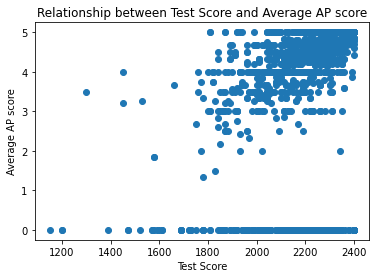

In [29]:
# your code here

plt.scatter(college_train["test_score"], college_train["avg_ap"])
plt.xlabel("Test Score")
plt.ylabel("Average AP score")
plt.title("Relationship between Test Score and Average AP score");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.5** Interpret and compare the classification accuracies for the two models, `logit2_1` and `logit2_3`.  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar or different.

</div>

_Points:_ 4

In [30]:
# Display accuracies of last 2 models
print(
    "\nThe classification accuracies for 'logit2_1' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_1, acc_test_logit2_1)
)
print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)


The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013

The classification accuracies for 'logit2_3' are:

	Train	0.7373
	TEST	0.7013


`logit2_1` and `logit2_3` result in the *same* classification accuracies. A prime factor in this conclusion is none other than the aforementioned strong correlation between `test_score` and `average_ap`: we are essentially fitting the model on the same data, which is why these accuracies are so similar. 

<!-- END QUESTION -->

---

<a id="part3"></a>

## <div class='exercise'>Question 3: Harvard and Yale? [30 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.1**
- Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]`.
- Store the train and test accuracies in `acc_train_logit3_1` and `acc_test_logit3_1`.
- Use the code provided to output the coefficient estimates. Interpret the coefficients for the binary predictors in this model.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 4

The binary predictors in this model are:

- `harvard`: $e^{\beta_{harvard}} = 1.149$. This means that for an applicant applying to Harvard, the odds that this applicant is admitted is 1.15 times the odds for someone applying to Yale. This is a very similar result to our result from Q1.6, which is likely to suggest an quasi-insignificant correlation between `harvard` and the rest of the predictors in this regression 


- `female`: $e^{\beta_{female}} = 0.978$. For a female applicant, the odds of being admitted are $0.978$ times those of a male. This suggests quasi-parity of odds between the 2 categories, which is not that significant of a result.



- `minority`: $e^{\beta_{minority}} = 1.571$. For a minority applicant, the odds of being admitted are $1.571$ times those of a non-minority. This result is quite significant.

In [31]:
# Print statements below assume predictors used in this order
logit3_1_predictors = ["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]

In [32]:
# your code here

X_train, y_train = college_train[[x for x in logit3_1_predictors]], college_train['admitted'] 
X_test, y_test = college_test[[x for x in logit3_1_predictors]], college_test['admitted']


logit3_1 = LogisticRegression(penalty='none', max_iter=1000)
logit3_1.fit(X_train, y_train)

acc_train_logit3_1 = logit3_1.score(X_train, y_train)
acc_test_logit3_1 = logit3_1.score(X_test, y_test)

In [33]:
# Grab model's intercept and coefs regardless of their shape
# (which depends on how x and y were shaped)

logit3_1_intercept = np.array(logit3_1.intercept_).flatten()[0]
logit3_1_coefs = logit3_1.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_1' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_1_intercept
    )
)
for predictor, coef in zip(logit3_1_predictors, logit3_1_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit3_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit3_1, acc_test_logit3_1)
)

The intercept and coefficients for the 'logit3_1' model are:

	intercept           -1.1656
	harvard             0.1392
	test_score          0.0030
	ap                  -0.0198
	avg_ap              0.0305
	gpa                 -1.7419
	female              -0.0220
	minority            0.4519

The classification accuracies for 'logit3_1' are:

	Train	0.7320
	TEST	0.7013


In [34]:
pd.DataFrame({'$e^{coeff}$': np.exp(logit3_1.coef_[0])}, 
             index=logit3_1_predictors)

,$e^{coeff}$
harvard,1.149
test_score,1.003
ap,0.980
avg_ap,1.031
gpa,0.175
female,0.978
minority,1.571


In [35]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `["harvard", "test_score", "ap"]` along with the 2 interaction terms: `harvard` with `test_score` and `harvard` with `ap`. Name the columns for these interaction terms `harvard_test_score` and `harvard_ap`.

</div>

_Points:_ 3

In [36]:
college_train['harvard_test_score'] = college_train['harvard'] * college_train['test_score']
college_test['harvard_test_score'] = college_test['harvard'] * college_test['test_score']

college_train['harvard_ap'] = college_train['harvard'] * college_train['ap']
college_test['harvard_ap'] = college_test['harvard'] * college_test['ap']

In [37]:
# Print statement below assumes this order of predictors
logit3_2_predictors = ["harvard", "test_score", "ap", "harvard_test_score", "harvard_ap"]

X_train, y_train = college_train[[x for x in logit3_2_predictors]], college_train['admitted']
X_test, y_test = college_test[[x for x in logit3_2_predictors]], college_test['admitted']

In [38]:
# your code here

logit3_2 = LogisticRegression(penalty = 'none', max_iter = 1000, random_state=5)
logit3_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none', random_state=5)

In [39]:
# Display results
logit3_2_intercept = np.array(logit3_2.intercept_).flatten()[0]
logit3_2_coefs = logit3_2.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_2' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_2_intercept
    )
)

for predictor, coef in zip(logit3_2_predictors, logit3_2_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

The intercept and coefficients for the 'logit3_2' model are:

	intercept           -7.1344
	harvard             -4.4410
	test_score          0.0027
	ap                  0.0240
	harvard_test_score  0.0022
	harvard_ap          -0.1101


In [40]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.3** Simplify and write out mathematically the above model from Question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test_score` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
    
**NOTE:** All of your mathematical statements should be written out in your markdown cells using $\LaTeX$. Show all your steps, not just the final result.

</div>

_Points:_ 4

We first present the general model with the interaction terms:

$$\ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_1X_2 + \beta_5 X_1 X_3 $$

Where $X_1$ corresponds to the `harvard` variable, $X_2$ to the `test_score` variable and $X_3$ to the `ap` one. Recall that `harvard` ($X_1$) takes the value $1$ if applicant is applying to Harvard $0$ if not. Hence, $X_1X_2$ and $X_1 X_3$ are `harvard_test_score` and `harvard_ap` respectively.

Therefore, we have for someone applying to Harvard:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_2 + \beta_5 X_3 $$

Similarly, for someone applying to Yale:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_2 X_2 + \beta_3 X_3 $$
   


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test_score` as a function of `ap` would an applicant be predicted to have a better than 50% chance (i.e. 0.5 probability) of being admitted into the college they applied to? 

Use the function for Harvard to answer the following question: if a student scored a perfect 2400 on `test_score`, what is the range of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

Again, you should show your work in $\LaTeX$.
</div>

_Points:_ 5

We have:

For Harvard ($X_1 = 1$):

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_2 + \beta_5 X_3 $$

For Yale ($X_1 = 0$):

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_2 X_2 + \beta_3 X_3 $$

If $p = 0.5$, we simply have $ln(\frac{p}{1-p}) = 0$:

Solving separately for Harvard and Yale yields the following boundaries:

Harvard ($X_1=1$):
$$X_2 = -\frac{1}{\beta_2}(\beta_0 + \beta_1 + \beta_3X_3 + \beta_4X_2 + \beta_5X_3)$$
Yale ($X_1=0$):
$$X_2 = -\frac{1}{\beta_2}(\beta_0 + \beta_3X_3)$$

If a student scored a perfect 2400 on test, the range of AP tests they should take to have more than a 50% probability of getting admitted to Harvard would satisfy the following inequality:

$$ \beta_0 + \beta_1 + 2400\beta_2  + \beta_3 X_3 + 2400\beta_4 + \beta_5X_3 > 0 $$ 

Solving whilst taking into account the sign of our coefficients yields:

$$X_3 < -\frac{1}{\beta_3 + \beta_5} (\beta_0 + \beta_1 + 2400\beta_2 + 2400\beta_4 )$$

Using the code below enables us to conclude that students should take less than **3** AP tests to have more 50% probability of getting into Harvard. 

In [41]:
ap_ = -1/(logit3_2.coef_[0][2]
          +logit3_2.coef_[0][4]) * (2400* logit3_2.coef_[0][3] + 2400* logit3_2.coef_[0][1] + logit3_2.intercept_[0] + logit3_2.coef_[0][0])
ap_


3.1144259947084194

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test_score` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (including both the location of the boundaries and where the points lie around these boundaries).

**NOTE:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret. It will likely take some careful work here to generate plots with data points that are clear and easy to see. You might try 'dithering' the points with a random offset so they are not all on top of one another.
    
</div>

_Points:_ 5

Observing the scatter plots, it seems that for both universities, most points are *below* the boundary. However, the Harvard boundary has some points above it. This is not the case for Yale. 
This means that our model will always predict a rejection from Yale, and most of the time for Harvard. The exceptions to this rule would be applicants having a very high `ap` variable value and high `test_score`.

In [42]:
harvard_boundary = -1/(logit3_2.coef_[0][1]+logit3_2.coef_[0][3]) * (logit3_2.intercept_[0] + logit3_2.coef_[0][0] + logit3_2.coef_[0][2]*college_train["ap"] + logit3_2.coef_[0][4]*college_train["ap"])
yale_boundary = -1/(logit3_2.coef_[0][1]) * (logit3_2.intercept_[0] + logit3_2.coef_[0][2] * college_train["ap"])

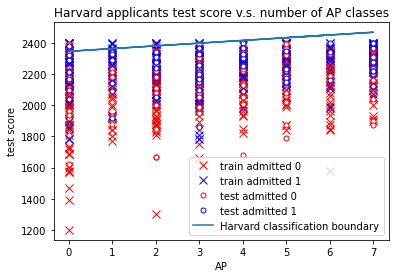

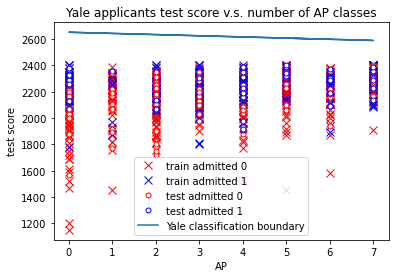

In [43]:
# your code here

harvard_train = college_train[college_train["harvard"]==1]
harvard_test = college_test[college_test["harvard"]==1]
yale_train = college_train[college_train["harvard"]==0]
yale_test = college_test[college_test["harvard"]==0]
train_admitted = harvard_train.groupby("admitted")
test_admitted = harvard_test.groupby("admitted")
colors = ("red", "blue")
for i, (name, group) in enumerate(train_admitted):
    plt.plot(group.ap, group.test_score, marker='x', color = colors[i], linestyle='', markersize=8, label="train admitted {}".format(name))
for i, (name, group) in enumerate(test_admitted):
    plt.plot(group.ap, group.test_score, marker='o', markerfacecolor='white', color = colors[i], linestyle='', markersize=5, label="test admitted {}".format(name))

plt.plot(college_train["ap"],harvard_boundary, label='Harvard classification boundary')
    
    
plt.legend()
plt.xlabel("AP")
plt.ylabel("test score")
plt.title("Harvard applicants test score v.s. number of AP classes")
plt.show()
train_admitted = yale_train.groupby("admitted")
test_admitted = yale_test.groupby("admitted")
for i, (name, group) in enumerate(train_admitted):
    plt.plot(group.ap, group.test_score, marker='x', color = colors[i], linestyle='', markersize=8, label="train admitted {}".format(name))
for i, (name, group) in enumerate(test_admitted):
    plt.plot(group.ap, group.test_score, marker='o', markerfacecolor='white', color = colors[i], linestyle='', markersize=5, label="test admitted {}".format(name))
    
plt.plot(college_train["ap"],yale_boundary, label='Yale classification boundary')
    
plt.legend()
plt.xlabel("AP")
plt.ylabel("test score")
plt.title("Yale applicants test score v.s. number of AP classes")
plt.show()

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `["harvard", "test_score", "female", "minority"]` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`. 
    
</div>

_Points:_ 3

In [44]:
# Provided code assumes this order of predictors

college_train['harvard_female'] = college_train['female'] * college_train['harvard']
college_test['harvard_female'] = college_test['female'] * college_test['harvard']

college_train['harvard_minority'] = college_train['minority'] * college_train['harvard']
college_test['harvard_minority'] = college_test['minority'] * college_test['harvard']

logit3_6_predictors = ["harvard",
                       "test_score",
                       "female",
                       "minority",
                       "harvard_female",
                       "harvard_minority"
                      ]



In [45]:
# your code here

X_train, y_train = college_train[[ x for x in logit3_6_predictors]], college_train['admitted']
X_test, y_test = college_test[[ x for x in logit3_6_predictors]], college_test['admitted']


logit3_6 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5)

logit3_6.fit(X_train, y_train)



LogisticRegression(max_iter=1000, penalty='none', random_state=5)

In [46]:
grader.check("q3.6")

q3.6 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
    
</div>

_Points:_ 4

In [47]:
# Display results
logit3_6_intercept = np.array(logit3_6.intercept_).flatten()[0]
logit3_6_coefs = logit3_6.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_6' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_6_intercept
    )
)

for predictor, coef in zip(logit3_6_predictors, logit3_6_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

The intercept and coefficients for the 'logit3_6' model are:

	intercept           -11.1157
	harvard             0.1681
	test_score          0.0044
	female              -0.1191
	minority            1.2482
	harvard_female      0.3113
	harvard_minority    -0.7247


In [48]:
pd.DataFrame({'$e^{coeff}$': np.exp(logit3_6.coef_[0])}, 
             index=logit3_6_predictors)

,$e^{coeff}$
harvard,1.183
test_score,1.004
female,0.888
minority,3.484
harvard_female,1.365
harvard_minority,0.484


- $e^{\beta_{female}} = 0.888$
- $e^{\beta_{minority}} = 3.484$


We start by noting that `minority` has a higher impact than sex (`female`). From the dataframe above, this is because the odds of getting admitted for minorities is 3.484 times the odds for non-minorities. Additionally, regarding `female`, the odds ratio is 0.888 (probability of being admitted as a female is 0.888 that of a male).

- `harvard_female` $= 0.3113$
-  `harvard_minority` $=    -0.7247$

The predicted probability decreases with the value of the covariate in the case of minorities: minority students are less likely to apply to Harvard. The opposite is true for females, but to a very small extent as the coefficient's value is quite small. 

Minority students have a higher chance of being admitted to Harvard. However they are also less likely to apply. Additionally, an applicant's sex does not seem to have a significant effect on the probability to apply to Harvard. 



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting women and minorities?  Why would it be wrong to take this interpretation as truth?

</div>

_Points:_ 2

Based on this sample, it seems that both schools tend to respond more favourably to minority group applications. However, it seems like successful applicants at Harvard tend to take less AP classes than successful applicants at Yale. One may then categorise this interpretation as erroneous for previously outlined reasons: data pulled from collegedata.com comes from volunteers, and thus is more reflective of applicants who are eager to share their results (e.g., happier of their admission when they considered odds to be low). This may be reflective of a certain bias, and may impede us from extending our results to the general population. 

<!-- END QUESTION -->

---

<a id="part4"></a>

## <div class='exercise'>Question 4: Building predictive models for admitted [24 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test_score` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regularized regression and/or distance-based algorithms such as $k$-NN classification. **(1)** Please explain why scaling under these circumstances might be important. Then, **(2)** actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors. **For the sake of consistency, fit your scaler on just the training data. Then use it to transform both train and test.**

**IMPORTANT:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set. Tests from this point on assume that `X_train` and `X_test` have been standardized with the approach outlined above. 

</div>

_Points:_ 4

In the case of a *regularized* regression, scaling is important as coefficient values depend on variable scale. These are then *shrinked* based on that scale, independently of their meaning: scaling leads to the shrinkage to be on the *same base* for all coefficients. Recall that in the case of distance-based algorithms, there is a difference in the effects of high and low-scale variables, as the former will tend to have a more significant impact on distance, which is not necessarily wanted.

In [49]:
predictors = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa", "female", "minority", "international","sports", "harvard", "early_app", "alumni"]

binary_predictors = ["female","minority","international","sports","early_app","alumni","harvard"]
non_binary_predictors = [i for i in predictors if i not in binary_predictors]

X_train = college_train[non_binary_predictors]
X_test = college_test[non_binary_predictors]

scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X_test.columns, index=X_test.index)

X_train = pd.concat([X_train,college_train[binary_predictors]],axis=1)
X_test = pd.concat([X_test,college_test[binary_predictors]],axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
# preview summary stats after standardizing
X_train.describe()

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,early_app,alumni,harvard
count,1.496e+03,1.496e+03,1.496e+03,1.496e+03,1.496e+03,1496.0,1496.000,1496.000,1496.000,1496.000,1496.000,1496.000
mean,1.296e-15,-7.332e-17,3.112e-16,5.418e-17,1.863e-16,0.5,0.207,0.060,0.035,0.177,0.049,0.524
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,0.5,0.405,0.238,0.183,0.382,0.217,0.500
min,-6.089e+00,-1.473e+00,-2.191e+00,-2.221e+00,-9.529e+00,0.0,0.000,0.000,0.000,0.000,0.000,0.000
25%,-4.440e-01,-6.158e-01,-7.730e-02,-6.703e-01,-2.432e-01,0.0,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.029e-01,-1.871e-01,4.144e-01,1.052e-01,4.093e-01,0.5,0.000,0.000,0.000,0.000,0.000,1.000
75%,7.322e-01,6.703e-01,7.506e-01,1.052e-01,6.101e-01,1.0,0.000,0.000,0.000,0.000,0.000,1.000
max,1.261e+00,1.528e+00,7.506e-01,2.432e+00,6.101e-01,1.0,1.000,1.000,1.000,1.000,1.000,1.000


In [51]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]` and 10-fold cross-validation with classification accuracy as the scoring metric. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, store your chosen $k$ in `best_k` and the classification accuracy on train and test for your final fitted model as `knn_train_acc` and `knn_test_acc`.
    
</div>

_Points:_ 4

In [52]:
np.random.seed(121) # Do not delete or modify this line of code

# your code here

validation_mse, train_mse, test_mse = [], [], []
ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]

for k in ks:
    model = KNeighborsClassifier(k)
    
    mse_score = cross_validate(model, X_train, y_train, scoring='accuracy', cv=10, return_train_score=True)
    validation_mse.append(np.mean(mse_score['test_score']))
    train_mse.append(np.mean(mse_score['train_score']))
    test_mse.append(np.mean(mse_score['test_score']))

best_k = ks[np.argmax(test_mse)]


model_best_k = KNeighborsClassifier(best_k).fit(X_train, y_train)

knn_train_acc = model_best_k.score(X_train, y_train)
knn_test_acc = model_best_k.score(X_test, y_test)

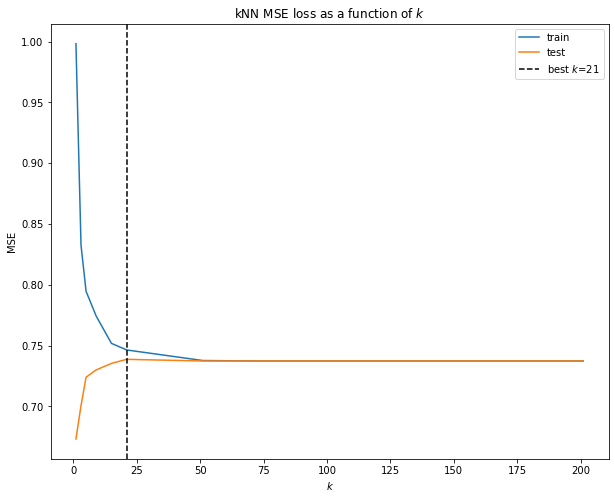

In [53]:
# Plot cross-validation results
# your code here


plt.figure(figsize=(10, 8))
plt.plot(ks, train_mse, label='train')
plt.plot(ks, test_mse, label='test')
plt.axvline(best_k, c='k', ls='--', label=rf'best $k$={best_k}')
plt.xlabel(r'$k$')
plt.ylabel('MSE')
plt.title('kNN MSE loss as a function of $k$')
plt.legend();

In [54]:
print(
    "The classification accuracies for 'knn_model' where k={} "
    "are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        best_k, knn_train_acc, knn_test_acc
    )
)

# create dict for storing test scores for each Q4 model
q4_test_scores = {"knn_model": knn_test_acc}

The classification accuracies for 'knn_model' where k=21 are:

	Train	0.7447
	TEST	0.7013


<!-- END QUESTION -->

<div class='exercise-r'>

**Q4.3** Fit the full logistic regression model (without penalty) with main effects of all 12 predictors in it (call it `logit_full`). Store the classification accuracy on train and test for this model in `logit_full_train_acc` and `logit_full_test_acc`.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 3

In [55]:
# The code that prints your results assumes
# predictors were given to the model in this order
predictor_list = [
    "test_score", "ap", "avg_ap", "sat_subjects",
    "gpa", "female", "minority", "international",
    "sports", "harvard", "early_app", "alumni",
]

In [56]:
# your code here
logit_full = LogisticRegression(penalty='none', max_iter = 1000)
logit_full.fit(X_train,y_train)


logit_full_train_acc = logit_full.score(X_train, y_train)
logit_full_test_acc = logit_full.score(X_test, y_test)

In [57]:
# display your results
print(
    "The intercept and coefficients for the 'logit_full' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_full.intercept_).flatten()[0]
    )
)

for predictor, coef in zip(predictor_list, logit_full.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_full' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_full_train_acc, logit_full_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_full"] = logit_full_test_acc

The intercept and coefficients for the 'logit_full' model are:

	intercept           -1.7090
	test_score          0.7838
	ap                  -0.1403
	avg_ap              0.0975
	sat_subjects        -0.0952
	gpa                 0.1056
	female              0.0518
	minority            0.9165
	international       0.4500
	sports              1.2334
	harvard             0.3737
	early_app           0.6629
	alumni              0.2581

The classification accuracies for 'logit_full' are:

	Train	0.7453
	TEST	0.7147


In [58]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<div class='exercise-r'>

**Q4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Store the classification accuracy on train and test for this model in `logit_lasso_train_acc` and `logit_lasso_test_acc`.

</div>

_Points:_ 4

In [59]:
# your code here
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
cv = 10
penalty = 'l1' # Lasso
solver = 'liblinear'
logit_lasso = LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver=solver
).fit(X_train, y_train)

logit_lasso_train_acc = logit_lasso.score(X_train, y_train)
logit_lasso_test_acc = logit_lasso.score(X_test, y_test)

In [60]:
# Display your results
print(
    "The intercept and coefficients for the 'logit_lasso' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_lasso.intercept_).flatten()[0]
    )
)

# Again, this code assumes predictors were given to the model
# in the order defined in `predictor_list`
for predictor, coef in zip(predictor_list, logit_lasso.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_lasso' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_lasso_train_acc, logit_lasso_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_lasso"] = logit_lasso_test_acc

The intercept and coefficients for the 'logit_lasso' model are:

	intercept           -1.7014
	test_score          0.7819
	ap                  -0.1388
	avg_ap              0.0952
	sat_subjects        -0.0943
	gpa                 0.1045
	female              0.0493
	minority            0.9121
	international       0.4403
	sports              1.2214
	harvard             0.3701
	early_app           0.6563
	alumni              0.2545

The classification accuracies for 'logit_lasso' are:

	Train	0.7453
	TEST	0.7147


In [61]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<div class='exercise-r'>

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? Please remember that, as a general practice, zero-value Lasso coefficients (i.e. $\beta_i=0$) are considered "unimportant". Store your results in `predictors_important` and `predictors_not_important`.
 
</div>

_Points:_ 3

In [62]:
# your code here

# Creating a dictionary with predictors and coefficients:
coef_dict = {k:v for k,v in zip(X_train.columns, logit_lasso.coef_[0])}

# Identifying coefficients >0 (ABSOLUTE VALUE)
important_coefs = [i for i in coef_dict.values() if np.abs(i)>0]

# Function to return important predictors:
def get_predictor(val):
    for key, value in coef_dict.items():
        if val == value:
            return key
 
    return "key doesn't exist"



predictors_important = [get_predictor(i) for i in important_coefs]    
predictors_not_important = [i for i in X_train.columns if i not in predictors_important]

In [63]:
# display results
print(
    "The following predictors were deemed important by "
    "'logit_lasso' (i.e. coef != 0):\n\n\t{}\n\n\n"
    "While, the remaining were deemed unimportant (i.e. "
    "coef == 0):\n\n\t{}"
    .format(
        predictors_important,
        predictors_not_important,
    )
)

The following predictors were deemed important by 'logit_lasso' (i.e. coef != 0):

	['test_score', 'ap', 'avg_ap', 'sat_subjects', 'gpa', 'female', 'minority', 'international', 'sports', 'early_app', 'alumni', 'harvard']


While, the remaining were deemed unimportant (i.e. coef == 0):

	[]


In [64]:
grader.check("q4.5")

q4.5 results: All test cases passed!

<div class='exercise-r'>

**Q4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the unique 2-way interactions between them (call it `lasso_interact`).  Again use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Record the accuracy on train and test for this model in `lasso_interact_train_acc` and `lasso_interact_test_acc`.

</div>

_Points:_ 4

In [65]:
# your code here
X_train_imp = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X_train)
X_test_imp = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X_test)

In [66]:
# your code here

lasso_interact = LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(X_train_imp, y_train)

lasso_interact_train_acc = lasso_interact.score(X_train_imp, y_train)
lasso_interact_test_acc = lasso_interact.score(X_test_imp, y_test)

In [67]:
print(
    "\nThe classification accuracies for 'logit_lasso_interact' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(lasso_interact_train_acc, lasso_interact_test_acc)
)

# store test score to dict for later use
q4_test_scores["lasso_interact"] = lasso_interact_test_acc


The classification accuracies for 'logit_lasso_interact' are:

	Train	0.7647
	TEST	0.7040



<div class='exercise-r'>

**Q4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? Store these numbers in `num_important_coefs` and `num_unimportant_coefs`. 
    
</div>

_Points:_ 2

In [68]:
# your code here

num_important_coefs = np.sum(lasso_interact.coef_[0][1:]!=0)
num_unimportant_coefs = np.sum(lasso_interact.coef_[0][1:]==0)

In [69]:
print(
    "Of the {} predictors used in our 'logit_lasso_interact' model:"
    "\n\n\t{} predictors were deemed 'important' by our model"
    "\n\t{} predictors were deemed 'unimportant' with 0-valued "
    "coefficients".format(
        num_important_coefs + num_unimportant_coefs,
        num_important_coefs,
        num_unimportant_coefs
    )
)

Of the 77 predictors used in our 'logit_lasso_interact' model:

	59 predictors were deemed 'important' by our model
	18 predictors were deemed 'unimportant' with 0-valued coefficients


---

<a id="part5"></a>

## <div class='exercise'>Question 5: Evaluating results [12 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.1** Which of the 4 models in Question 4 performs the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in Question 1.1? What does this comparison to the "naive" model tell us?
    
</div>

_Points:_ 2.5

In [70]:
# your code here
print("The TEST accuracies for the 4 models in Q4 are:\n")
for key, value in q4_test_scores.items():
    print("\t{:<25}{:.4f}".format(key, value))
print(
    "\nThe TEST accuracy for our original baseline \"naive\" "
    "model was {:.4f}".format(naive_test_acc)
)

The TEST accuracies for the 4 models in Q4 are:

	knn_model                0.7013
	logit_full               0.7147
	logit_lasso              0.7147
	lasso_interact           0.7040

The TEST accuracy for our original baseline "naive" model was 0.7013


The model that performs best based on classification accuracy is the logit model, whether it is `logit_full` or `logit_lasso` that both boast a classification accuracy of $0.7147$. The one that performs the worst is the `knn_model` with $0.7013$, it does not add any more value than the baseline accuracy which was also $0.7013$. This tells us that a "naive" classification is not that naive as the models may very well suffer from a certain level of bias in the data, and thus are unable to give us much more information. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in Question 5.1 is better than the worst model identified in 5.1?  How do you know?
    
</div>

_Points:_ 4.5

- All ROC curves are fairly similar, except for the KNN one. This is specific to how a KNN Classifier works, as the notion of probability is limited to the `best_k` we chose (21)

- One may define the "best ROC curves" as those that display a combination of a high True Positive Rate and a low False positive rate, which means that stretch to the North-West corner of the plot. This is the case for the `logit_full` and `logit_lasso` models which had the best classification accuracies in the previous question

In [71]:
# your code here

Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 10
penalty = 'l1'
solver = 'liblinear'

# Scaling data
original_predictors = ['test_score', 
                         'ap', 'avg_ap', 'sat_subjects', 'gpa',	
                         'sports', 'alumni', 'early_app', 'international', 'female', 'minority']

non_binary  = ['test_score', 'ap', 'avg_ap', 'sat_subjects', 'gpa']
binary = [i for i in original_predictors if i not in non_binary]
X_train = college_train[non_binary]
X_test = college_test[non_binary]

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

X_train = pd.concat([X_train,college_train[binary]],axis=1)
X_test = pd.concat([X_test,college_test[binary]],axis=1)

X_train_poly = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X_test)

In [72]:
# your code here
# model 4_2

knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)

y_hat_knn = knn.predict_proba(X_test)[:,1]

# model 4_3
logit_full=LogisticRegression(penalty='none', max_iter = 1000)
logit_full.fit(X_train,y_train)
y_hat_logit_full = logit_full.predict_proba(X_test)[:,1]

# model 4_4
logit_lasso = LogisticRegressionCV(Cs=Cs, cv=cv, penalty=penalty, solver='liblinear').fit(X_train, y_train)
y_hat_logit_lasso = logit_lasso.predict_proba(X_test)[:,1]

# model 4_6
lasso_interact = LogisticRegressionCV(Cs=Cs, cv=cv, penalty=penalty, solver='liblinear').fit(X_train_poly, y_train)
y_hat_lasso_interact = lasso_interact.predict_proba(X_test_poly)[:,1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_hat_knn)
fpr_logit_full, tpr_logit_full, thresholds_logit_full = roc_curve(y_test, y_hat_logit_full)
fpr_logit_lasso, tpr_logit_lasso, thresholds_logit_lasso = roc_curve(y_test, y_hat_logit_lasso)
fpr_lasso_interact, tpr_lasso_interact, thresholds_logit_lasso_interact = roc_curve(y_test, y_hat_lasso_interact)

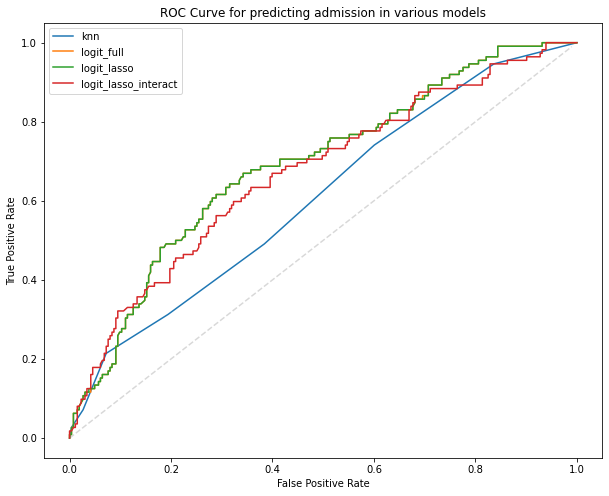

In [73]:
# your code here

x=np.arange(0,100)/100
plt.figure(figsize=(10,8))
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr_knn,tpr_knn,label="knn")
plt.plot(fpr_logit_full,tpr_logit_full,label="logit_full")
plt.plot(fpr_logit_lasso,tpr_logit_lasso,label="logit_lasso")
plt.plot(fpr_lasso_interact,tpr_lasso_interact,label="logit_lasso_interact")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for predicting admission in various models")
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**5.3** Calculate the AUC for all 4 models and store these in `auc_list`. **The order of AUCs in the list should match the order of the model as they appear in `q4_test_scores`.**
    
Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
    
</div>

_Points:_ 3

We want AUC score to be as close to 1 as possible. Hence, the ranking of these 4 models based on AUC matches the one based off of accuracy.
Accuracy determines the percentage of correct predictions made by a model. It is computed as a ratio of the number of true predictions with that of the total number of samples in the dataset.
AUC captures the area under the ROC curve and compares the relationship between the TPR with that of the FPR across different cut-off thresholds. 

Both of these metrics are very popular in assessing how well a model is doing and comparing one model to another. Hence, there is no reason here as to why they may result in different orderings.

In [74]:
# your code here
# calculate each model's AUC using its ROC fpr and tpr

auc_knn = roc_auc_score(y_test, y_hat_knn)
auc_logit_full = roc_auc_score(y_test, y_hat_logit_full)
auc_logit_lasso = roc_auc_score(y_test, y_hat_logit_lasso)
auc_lasso_interact = roc_auc_score(y_test, y_hat_lasso_interact)

auc_list = [auc_knn, auc_logit_full, auc_logit_lasso, auc_lasso_interact]
    

In [75]:
print(
    "The TEST accuracies vs. AUC scores for the 4 models in Q4 are:"
    "\n\n\t\t\t\tAccuracy\tAUC"
)
for (key, value), auc_value in zip(q4_test_scores.items(), auc_list):
    print("\t{:<24}{:.4f}\t\t{:.4f}".format(key, value, auc_value))

The TEST accuracies vs. AUC scores for the 4 models in Q4 are:

				Accuracy	AUC
	knn_model               0.7013		0.6077
	logit_full              0.7147		0.6908
	logit_lasso             0.7147		0.6908
	lasso_interact          0.7040		0.6701


In [76]:
grader.check("q5.3")

q5.3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use and why?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?
    
</div>

_Points:_ 2

AUC is the preferred metric for evaluating model predictions because of its capacity in handling bias in binary classification problems. We have seen on multiple occasions that our dataset suffers from a certain level of bias. With that in mind, one may choose the model that performs the best in regard to this metric: `logit_full`.

One may need to further consider making this a publicly available tool for college applicants. Recall that there is still a margin of error. This may give "false hopes" to some students, whilst inversely discouraging others who indeed have strong chances of being admitted but were predicted a rejection. 

<!-- END QUESTION -->

**This concludes HW5. Thank you!**

[Return to contents](#contents)